In [1]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Load and preprocess the data
features = pd.read_excel('数据融合--高温合金数据库.xlsx')

label1 = features['TYS'].to_numpy()
features = features.drop(['UTS','TYS','EL'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, label1, test_size=0.2, random_state=42)
model_seed = 100 
from sklearn.ensemble import RandomForestRegressor
# Train an SVR model
model = RandomForestRegressor(random_state=model_seed)
model.fit(X_train, y_train)

import matplotlib.pyplot as plt
import shap

# Assuming you have already defined 'explainer' using shap.KernelExplainer
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot with SHAP values on the bars
shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names=X_test.columns, show=False, max_display=len(X_test.columns))

# Customize the appearance of the plot
plt.gcf().set_size_inches(15, 10)
plt.title("SHAP Values for Features", fontsize=18)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_color('black')  # Set border color
plt.tick_params(axis='both', direction='in', length=5, width=1, color='black')
plt.gcf().set_dpi(600)
plt.tight_layout()
plt.show()

Using 820 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/205 [00:00<?, ?it/s]

Using 820 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/205 [00:00<?, ?it/s]

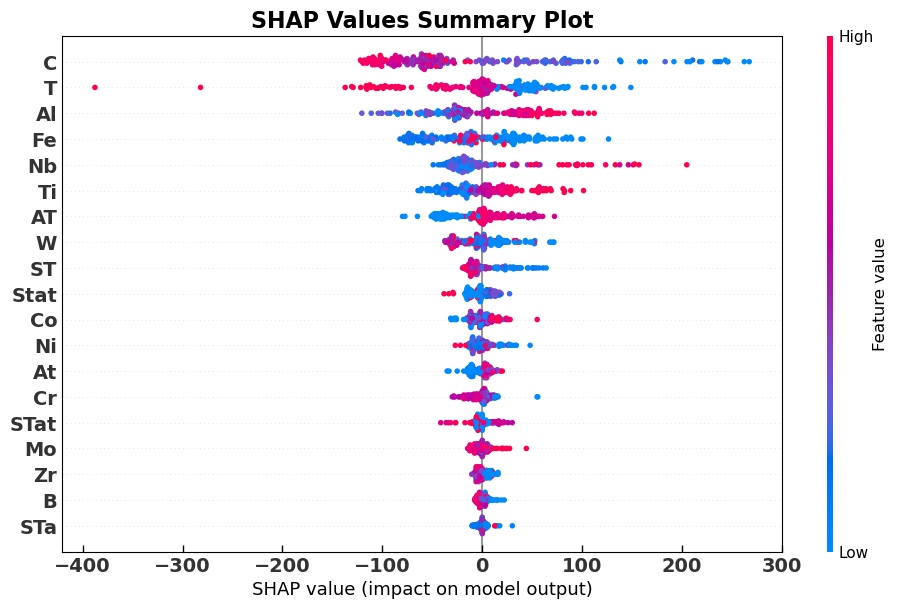

In [2]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load and preprocess the data
features = pd.read_excel('数据融合--高温合金数据库.xlsx')

label1 = features['TYS'].to_numpy()
features = features.drop(['UTS', 'TYS', 'EL'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, label1, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model_seed = 100
model = RandomForestRegressor(random_state=model_seed)
model.fit(X_train, y_train)

# Use the SHAP library to explain the model's predictions with KernelExplainer
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for each feature with customization and DPI setting
shap.summary_plot(shap_values, X_test, feature_names=features.columns, show=False, plot_size=(10, 6), max_display=len(features.columns))

# Customize plot appearance
plt.title('SHAP Values Summary Plot', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')  # Bold and larger font size for x-axis labels
plt.yticks(fontsize=14, fontweight='bold')  # Bold and larger font size for y-axis labels

# Add a border around each bar
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_color('black')  # Set border color

# Set tick parameters to make ticks point inwards
plt.tick_params(axis='both', direction='in', length=5, width=1, color='black')

# Save the figure with a specific DPI (dots per inch)
plt.savefig('shap_summary_plot_TYS.png', dpi=600)

# Show the plot
plt.show()